<a href="https://colab.research.google.com/github/ankithanatgit/house_price_prediction_and_ML_Model/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (300, 8)
  Property_ID  Area  Bedrooms  Bathrooms  Age     Location Property_Type  \
0    PROP0001  3712         4          3   36        Rural         House   
1    PROP0002  1591         4          1   35       Suburb         House   
2    PROP0003  1646         4          3   20        Rural         Villa   
3    PROP0004  4814         1          2   13  City Center         Villa   
4    PROP0005   800         4          2   38       Suburb     Apartment   

      Price  
0  22260000  
1  16057500  
2  12730000  
3  50840000  
4  10650000  

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location   

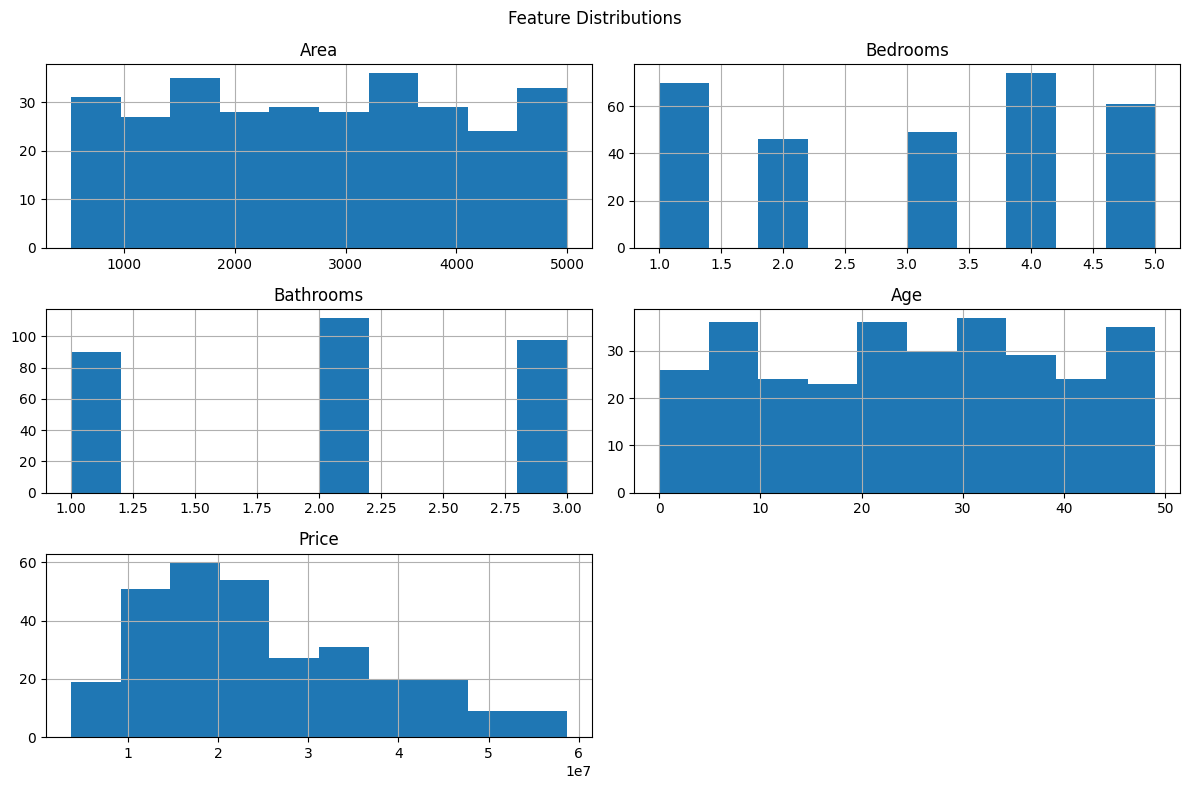

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

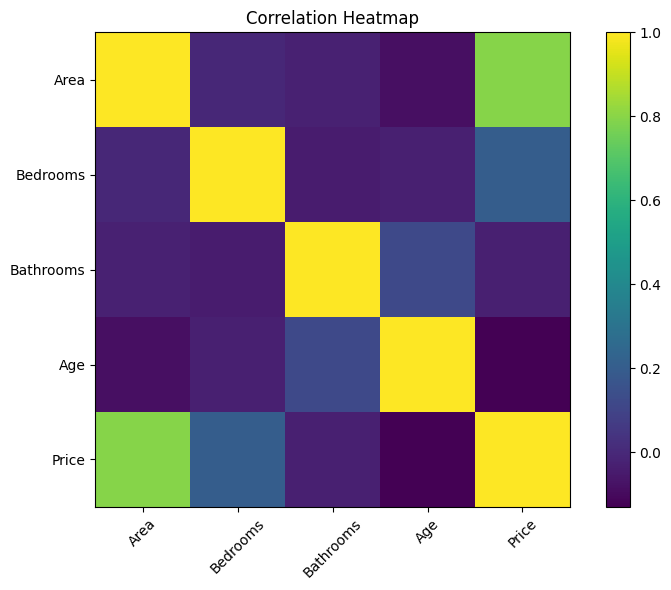

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Training Model: LinearRegression
LinearRegression → MAE: 2188736.34, RMSE: 2907633.21, R²: 0.9406


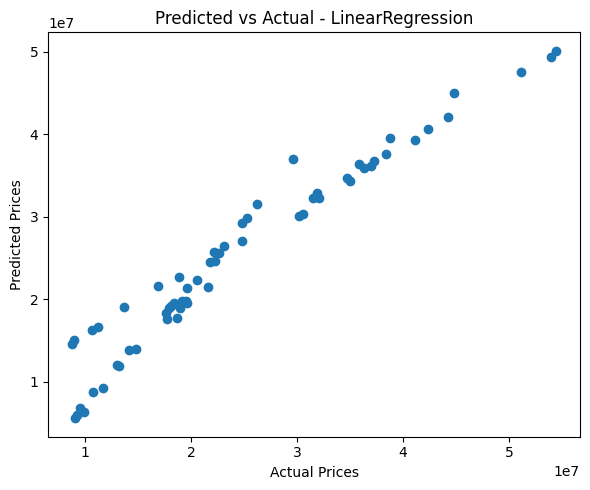

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Training Model: PolynomialRegression(deg2)
PolynomialRegression(deg2) → MAE: 0.00, RMSE: 0.00, R²: 1.0000


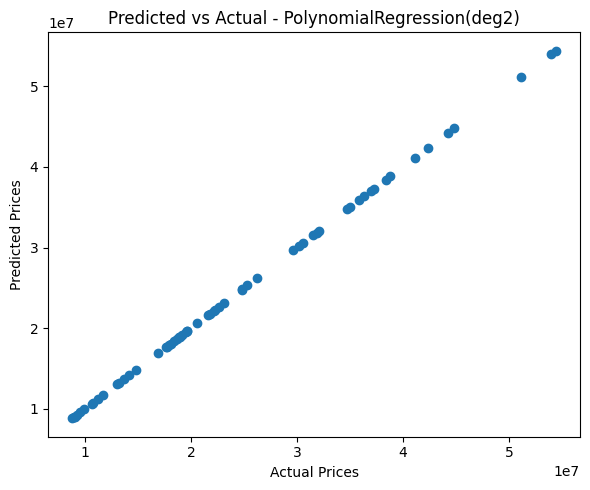

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Training Model: DecisionTree
DecisionTree → MAE: 2125458.33, RMSE: 2805103.22, R²: 0.9447


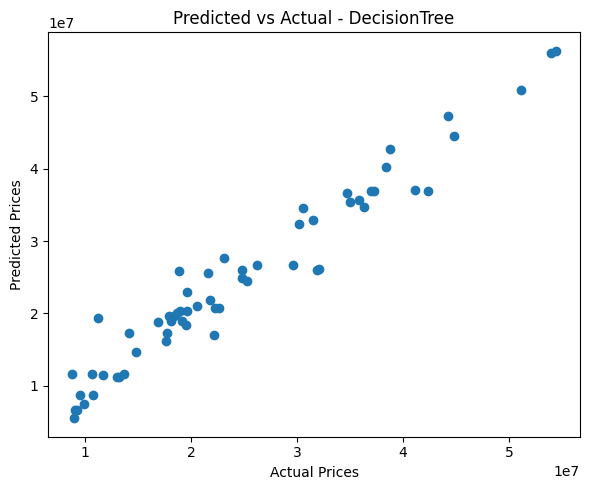

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Training Model: RandomForest
RandomForest → MAE: 1477892.08, RMSE: 1969000.09, R²: 0.9728


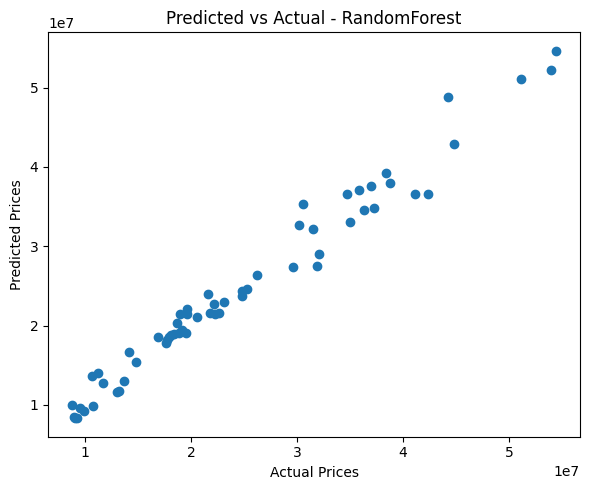

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- MODEL PERFORMANCE ---
                        Model           MAE           MSE          RMSE  \
1  PolynomialRegression(deg2)  2.100660e-06  7.730419e-12  2.780363e-06   
3                RandomForest  1.477892e+06  3.876961e+12  1.969000e+06   
2                DecisionTree  2.125458e+06  7.868604e+12  2.805103e+06   
0            LinearRegression  2.188736e+06  8.454331e+12  2.907633e+06   

         R2  
1  1.000000  
3  0.972778  
2  0.944750  
0  0.940637  


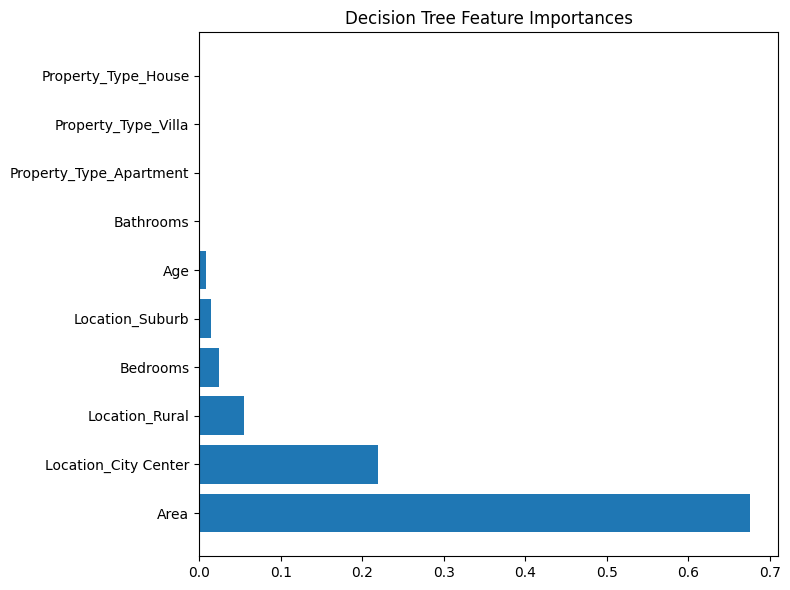

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

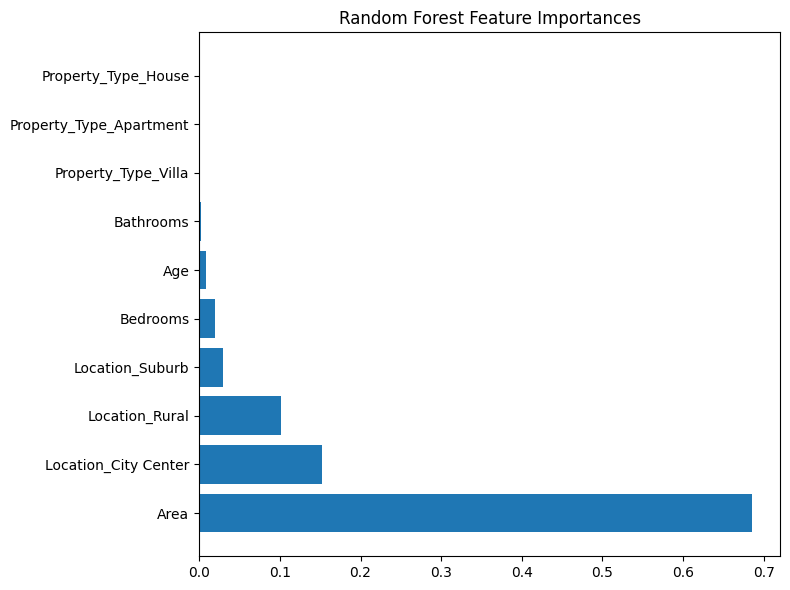

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Feature Importance Extraction Completed!


In [11]:
# ------------------------------------------------------
# HOUSE PRICE PREDICTION PROJECT (EDA + ML MODELS)
# ------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# 1. LOAD DATA
# --------------------
df = pd.read_csv('/house_prices.csv')

print("Dataset Shape:", df.shape)
print(df.head())

# --------------------
# 2. EDA
# --------------------

# Basic data info
print("\n--- Info ---")
print(df.info())

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Summary statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# Histogram plot
df.hist(figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.savefig('/content/feature_distributions.png')
plt.show()
from google.colab import files
files.download("feature_distributions.png")

# Correlation heatmap (numeric only)
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=[np.number]).corr()
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig('/content/correlation_heatmap.png')
plt.show()
from google.colab import files
files.download("correlation_heatmap.png")


# --------------------
# 3. FEATURE SELECTION
# --------------------

X = df[['Area', 'Bedrooms', 'Bathrooms', 'Age', 'Location', 'Property_Type']]
y = df['Price']

# --------------------
# 4. TRAIN-TEST SPLIT
# --------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------
# 5. PREPROCESSING
# --------------------

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_features = ['Location', 'Property_Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features)
    ],
    remainder='passthrough'
)

# --------------------
# 6. MODELS
# --------------------

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'LinearRegression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),

    'PolynomialRegression(deg2)': Pipeline([
        ('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regressor', LinearRegression())
    ]),

    'DecisionTree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),

    'RandomForest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))
    ])
}

# --------------------
# 7. TRAIN & EVALUATE
# --------------------

results = []

for name, model in models.items():
    print(f"\nTraining Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} → MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

    results.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    })

    # Plot Predictions vs Actual
    plt.figure(figsize=(6,5))
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Predicted vs Actual - {name}")
    plt.tight_layout()
    plt.savefig(f"/content/pred_vs_actual_{name}.png")
    plt.show()
    from google.colab import files
    files.download(f"pred_vs_actual_{name}.png")
    plt.show()
# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print("\n--- MODEL PERFORMANCE ---")
print(results_df)

results_df.to_csv("/content/model_results.csv", index=False)

# --------------------
# 8. FEATURE IMPORTANCE (Decision Tree & Random Forest)
# --------------------

# Fit preprocessor separately
preprocessor.fit(X_train)
ohe = preprocessor.named_transformers_['cat']
ohe_features = list(ohe.get_feature_names_out(cat_features))
num_features = ['Area', 'Bedrooms', 'Bathrooms', 'Age']
feature_names = ohe_features + num_features

# Decision Tree Feature Importance
dt_model = models['DecisionTree'].named_steps['regressor']
dt_importances = dt_model.feature_importances_

dt_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': dt_importances}) \
              .sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(dt_imp_df['Feature'], dt_imp_df['Importance'])
plt.title("Decision Tree Feature Importances")
plt.tight_layout()
plt.savefig('/content/dt_feature_importances.png')
plt.show()
from google.colab import files
files.download("/content/dt_feature_importances.png")     # download a single plot


# Random Forest Feature Importance
rf_model = models['RandomForest'].named_steps['regressor']
rf_importances = rf_model.feature_importances_

rf_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances}) \
              .sort_values('Importance', ascending=False)

plt.figure(figsize=(8,6))
plt.barh(rf_imp_df['Feature'], rf_imp_df['Importance'])
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.savefig('/content/rf_feature_importances.png')
plt.show()
from google.colab import files
files.download("/content/rf_feature_importances.png")     #

print("\nFeature Importance Extraction Completed!")